In [1]:
import Pkg; Pkg.instantiate()
Pkg.activate(".")

Precompiling project...
  ✓ DrugResponseModel
  1 dependency successfully precompiled in 37 seconds. 223 already precompiled.
  Activating project at `~/DrugResponseModel.jl`


In [2]:
using DelimitedFiles
using Plots
using Measures
using LinearAlgebra
using Statistics
using DSP: conv
using BlackBoxOptim
using JLD
using Distributions
using DataFrames
using XLSX
using StatsPlots
using NumericalIntegration
using CSV
using MultivariateStats
using Impute

In [3]:
using DrugResponseModel

In [4]:
using Plots.PlotMeasures 
gr()

Plots.GRBackend()

In [224]:
concs, popul1, g1s1, g2s1 = DrugResponseModel.load(189, 1)
_, popul2, g1s2, g2s2 = DrugResponseModel.load(189, 2)
_, popul3, g1s3, g2s3 = DrugResponseModel.load(189, 3)

_

LoadError: all-underscore identifier used as rvalue

In [54]:
# find the average of the three replicates
g1S = cat(g1s1, g1s2, g1s3, dims = 4)
g2S = cat(g2s1, g2s2, g2s3, dims = 4)
g1m = mean(g1S, dims = 4) # mean G1
g2m = mean(g2S, dims = 4) # mean G2

time = LinRange(0.0, 95.0, 189)

189-element LinRange{Float64, Int64}:
 0.0,0.505319,1.01064,1.51596,2.02128,…,92.9787,93.484,93.9894,94.4947,95.0

In [246]:
l_cost_820, l_hill_820 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 8, nG2 = 20, maxstep = 1000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_820 = getODEparams(l_hill_820, concs[:, 1])

l_G1_820 = zeros(189, 8) # model prediction of cell numbers for all 8 concentrations of lapatinib
l_G2_820 = zeros(189, 8)

#default: nG1 = 8, nG2 = 20  
for i = 1:8
    l_G1_820[:, i], l_G2_820[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_820[:, i, 1], l_hill_ODE_820[:, 1, 1], time)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.42 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 226.70
Function evals per second = 251.16
Improvements/step = 0.29900
Total function evaluations = 1109


Best candidate found: [683.021, 20.2811, 0.199013, 2.91709, 1.14503, 1.42508, 1.57884, 0.637751, 2.35221, 0.960237, 2.26125, 1.7302, 1.68492, 2.8394, 1.92142, 3.68219, 3.51851, 1.91943, 0.0703934, 2.12419, 2.17117, 1.75133, 2.91303, 0.973601, 2.64032, 0.84173]

Fitness: 767.747018979



In [205]:
l_cost_1640, l_hill_1640 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 16, nG2 = 40, maxstep = 1000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_1640 = getODEparams(l_hill_1640, concs[:, 1])

l_G1_1640 = zeros(189, 8) 
l_G2_1640 = zeros(189, 8)

#both nG1 and nG2 doubled: nG1 = 16, nG2 = 40 
for i = 1:8
    l_G1_1640[:, i], l_G2_1640[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_1640[:, i, 1], l_hill_ODE_1640[:, 1, 1], time, 16, 40)
end



Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.01 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 249.34
Function evals per second = 273.75
Improvements/step = 0.29100
Total function evaluations = 1099


Best candidate found: [966.885, 24.4301, 0.0108576, 0.755713, 0.581622, 0.412783, 1.6573, 0.440061, 2.26318, 1.82324, 0.838721, 2.31584, 0.700453, 2.46312, 2.2225, 3.81361, 0.831241, 1.5069, 0.0249206, 0.797029, 1.70984, 3.24979, 2.81679, 2.52535, 1.95345, 3.37669]

Fitness: 704.028381361



(704.0283813611178, [966.885410032364, 24.430070858609824, 0.010857591931133557, 0.7557132602501007, 0.5816216234749784, 0.41278311406529933, 1.6572972774114347, 0.44006112096443056, 2.263180572143378, 1.823237339551532  …  0.8312412475450149, 1.5069032071183899, 0.024920567817508184, 0.7970293367159562, 1.7098435727756718, 3.2497902347476324, 2.8167929258200424, 2.5253507321670794, 1.9534464939092124, 3.3766940381024018])

In [207]:
l_cost_1232, l_hill_1232 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 12, nG2 = 32, maxstep = 1000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_1232 = getODEparams(l_hill_1232, concs[:, 1])

l_G1_1232 = zeros(189, 8) 
l_G2_1232 = zeros(189, 8)


#both nG1 and nG2 increased: nG1 = 12, nG2 = 32 
for i = 1:8
    l_G1_1232[:, i], l_G2_1232[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_1232[:, i, 1], l_hill_ODE_1232[:, 1, 1], time, 12, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.29 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 233.60
Function evals per second = 257.87
Improvements/step = 0.28200
Total function evaluations = 1105


Best candidate found: [913.526, 10.6126, 0.287901, 1.57, 3.65454, 1.5138, 1.97424, 1.12861, 1.37484, 1.69816, 1.26714, 2.2168, 0.407347, 0.196011, 1.44811, 2.1673, 3.38422, 1.27283, 0.0413557, 3.71453, 3.16264, 2.91341, 1.37537, 1.42563, 2.59241, 2.33177]

Fitness: 682.130804207



(682.1308042070489, [913.5260001030995, 10.612647861881971, 0.28790132943216007, 1.5699972483252322, 3.654540519978023, 1.5137993575039483, 1.9742403457469857, 1.1286121142812926, 1.37483666347667, 1.6981579399824405  …  3.3842236956809097, 1.272826699211242, 0.0413556819990451, 3.714527098434201, 3.1626369126050125, 2.9134083002645514, 1.3753682447064763, 1.425631836106698, 2.592410739902808, 2.3317651615134607])

In [209]:
l_cost_832, l_hill_832 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 8, nG2 = 32, maxstep = 1000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_832 = getODEparams(l_hill_832, concs[:, 1])

l_G1_832 = zeros(189, 8) 
l_G2_832 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 32  
for i = 1:8
    l_G1_832[:, i], l_G2_832[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_832[:, i, 1], l_hill_ODE_832[:, 1, 1], time, 8, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 3.99 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 251.14
Function evals per second = 274.73
Improvements/step = 0.30000
Total function evaluations = 1095


Best candidate found: [301.877, 30.2652, 0.473862, 2.22124, 0.511198, 0.514108, 2.42708, 0.81933, 2.86704, 0.387371, 0.892484, 2.40726, 0.921651, 0.467875, 3.63632, 3.86943, 0.466552, 2.19461, 0.0366022, 3.193, 2.38659, 3.16857, 2.42781, 3.94188, 3.32334, 0.929111]

Fitness: 695.112031854



(695.1120318542122, [301.8768772902795, 30.26517673139307, 0.4738624356539066, 2.2212389009371636, 0.511198387067199, 0.514107622732499, 2.427081518387348, 0.8193303954958278, 2.8670368230044287, 0.38737127674011934  …  0.46655214410513546, 2.19461328823204, 0.03660224076726557, 3.1929974030418, 2.386590622790519, 3.168567606939659, 2.4278075094946026, 3.9418784544278047, 3.323343728275656, 0.9291107531396378])

In [211]:
l_cost_1220, l_hill_1220 = optimize_hill(concs[:, 1], g1m[:, :, 1], g2m[:, :, 1],
    nG1 = 12, nG2 = 20, maxstep = 1000)

# converting the Hill parameters to ODE parameters
l_hill_ODE_1220 = getODEparams(l_hill_1220, concs[:, 1])

l_G1_1220 = zeros(189, 8) 
l_G2_1220 = zeros(189, 8)


#nG1 increased: nG1 = 12, nG2 = 20 
for i = 1:8
    l_G1_1220[:, i], l_G2_1220[:, i], _ = 
    DrugResponseModel.predict(l_hill_ODE_1220[:, i, 1], l_hill_ODE_1220[:, 1, 1], time, 12, 20)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.35 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 230.20
Function evals per second = 249.98
Improvements/step = 0.25600
Total function evaluations = 1087


Best candidate found: [749.92, 32.2386, 0.0366884, 2.24747, 0.179593, 0.965951, 2.14243, 0.654956, 0.227918, 2.70236, 0.0103466, 0.885305, 0.275567, 1.55759, 3.53313, 0.109382, 0.241419, 0.532414, 0.0382256, 3.67959, 3.32756, 3.36173, 1.52805, 3.06583, 1.42518, 3.00078]

Fitness: 685.660268573



(685.6602685734653, [749.9204132392579, 32.23858711124053, 0.03668844049373264, 2.247468517167083, 0.17959349255261947, 0.9659513376410243, 2.142431005780117, 0.6549555438764277, 0.22791795879121368, 2.702355829293059  …  0.2414193101993909, 0.5324144514652969, 0.03822556550575404, 3.679591968757578, 3.327557627503935, 3.361733605950083, 1.528050063500568, 3.0658266609961546, 1.425181164686362, 3.000782930028345])

In [247]:
d_cost_820, d_hill_820 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 8, nG2 = 20, maxstep = 1000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_820 = getODEparams(d_hill_820, concs[:, 2])

d_G1_820 = zeros(189, 8) # model prediction of cell numbers for all 8 concentrations of lapatinib
d_G2_820 = zeros(189, 8)

#default: nG1 = 8, nG2 = 20  
for i = 1:8
    d_G1_820[:, i], d_G2_820[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_820[:, i, 1], d_hill_ODE_820[:, 1, 1], time)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.29 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 233.44
Function evals per second = 267.02
Improvements/step = 0.26400
Total function evaluations = 1145


Best candidate found: [194.26, 9.68561, 1.04059, 2.8683, 0.556617, 2.62656, 2.55312, 1.39999, 0.0329618, 2.74211, 1.71064, 1.72654, 2.58014, 0.741395, 0.933418, 0.0230432, 0.821834, 1.38902, 0.0380168, 2.63668, 3.87633, 2.55772, 2.71487, 1.92521, 1.57206, 2.86486]

Fitness: 766.271496962



In [249]:
d_cost_1640, d_hill_1640 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 16, nG2 = 40, maxstep = 1000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_1640 = getODEparams(l_hill_1640, concs[:, 2])

d_G1_1640 = zeros(189, 8) 
d_G2_1640 = zeros(189, 8)

#both nG1 and nG2 doubled: nG1 = 16, nG2 = 40 
for i = 1:8
    d_G1_1640[:, i], d_G2_1640[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_1640[:, i, 1], d_hill_ODE_1640[:, 1, 1], time, 16, 40)
end



Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.23 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 236.67
Function evals per second = 270.72
Improvements/step = 0.30000
Total function evaluations = 1145


Best candidate found: [749.977, 7.06588, 0.0295233, 3.2916, 2.88766, 2.18133, 2.42682, 3.44017, 2.25749, 1.24989, 1.6233, 2.46088, 1.84545, 3.63606, 1.96924, 3.87746, 1.32747, 2.66213, 0.00633997, 3.22579, 3.04968, 3.12938, 2.15037, 2.5375, 2.48977, 1.07613]

Fitness: 764.651315884



In [250]:
d_cost_1232, d_hill_1232 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 12, nG2 = 32, maxstep = 1000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_1232 = getODEparams(d_hill_1232, concs[:, 2])

d_G1_1232 = zeros(189, 8) 
d_G2_1232 = zeros(189, 8)


#both nG1 and nG2 increased: nG1 = 12, nG2 = 32 
for i = 1:8
    d_G1_1232[:, i], d_G2_1232[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_1232[:, i, 1], d_hill_ODE_1232[:, 1, 1], time, 12, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.24 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 236.11
Function evals per second = 267.72
Improvements/step = 0.26100
Total function evaluations = 1135


Best candidate found: [286.143, 5.91599, 0.304645, 3.13799, 2.03501, 3.75421, 0.684252, 1.37695, 3.55505, 3.17018, 1.45435, 0.0952784, 3.99548, 3.02887, 0.951989, 2.66402, 2.03339, 2.68086, 0.00962337, 2.56973, 2.67678, 3.95815, 2.90995, 2.17021, 3.49144, 2.7488]

Fitness: 748.663926261



In [251]:
d_cost_832, d_hill_832 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 8, nG2 = 32, maxstep = 1000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_832 = getODEparams(d_hill_832, concs[:, 2])

d_G1_832 = zeros(189, 8) 
d_G2_832 = zeros(189, 8)


#nG2 increased: nG1 = 8, nG2 = 32  
for i = 1:8
    d_G1_832[:, i], d_G2_832[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_832[:, i, 1], d_hill_ODE_832[:, 1, 1], time, 8, 32)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.02 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 249.31
Function evals per second = 279.70
Improvements/step = 0.25400
Total function evaluations = 1123


Best candidate found: [379.026, 22.5478, 0.0498845, 0.489938, 2.16434, 1.35878, 0.145542, 1.36107, 0.914361, 2.31869, 3.05515, 3.23104, 1.21124, 3.63104, 2.53593, 3.59012, 3.96431, 2.96019, 0.0192131, 1.936, 2.8089, 1.58147, 0.405639, 1.81681, 3.87608, 2.66866]

Fitness: 776.387506548



In [252]:
d_cost_1220, d_hill_1220 = optimize_hill(concs[:, 2], g1m[:, :, 2], g2m[:, :, 2],
    nG1 = 12, nG2 = 20, maxstep = 1000)

# converting the Hill parameters to ODE parameters
d_hill_ODE_1220 = getODEparams(d_hill_1220, concs[:, 2])

d_G1_1220 = zeros(189, 8) 
d_G2_1220 = zeros(189, 8)


#nG1 increased: nG1 = 12, nG2 = 20 
for i = 1:8
    d_G1_1220[:, i], d_G2_1220[:, i], _ = 
    DrugResponseModel.predict(d_hill_ODE_1220[:, i, 1], d_hill_ODE_1220[:, 1, 1], time, 12, 20)
end


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
DE modify state:

Optimization stopped after 1001 steps and 4.27 seconds
Termination reason: Max number of steps (1000) reached
Steps per second = 234.48
Function evals per second = 264.23
Improvements/step = 0.27500
Total function evaluations = 1128


Best candidate found: [136.301, 45.4577, 1.13458, 0.0909375, 0.0525671, 1.37254, 0.476843, 0.193163, 2.60695, 1.13916, 0.536446, 3.99127, 1.35602, 0.290324, 0.340511, 2.96791, 0.356116, 1.43316, 0.015356, 2.12291, 1.0317, 3.39957, 1.07979, 0.512912, 2.95296, 3.89995]

Fitness: 807.999065985



In [269]:
function plot_fig1(concs, g1, g1data, tite, G, subPlabel, palet, time)

    p = Plots.plot(
        time,
        g1,
        lw = 2,
        legend = :outertopright,
        label = ["control" "$(concs[4]) nM" "$(concs[5]) nM" "$(concs[6]) nM" "$(concs[7]) nM" "$(concs[8]) nM"],
        fg_legend = :transparent,
        palette = palet,
        title = tite,
        titlefont = Plots.font("Helvetica", 14),
        legendfont = Plots.font("Helvetica", 11),
        guidefont = Plots.font("Helvetica", 14),
        xtickfont = Plots.font("Helvetica", 14),
        ytickfont = Plots.font("Helvetica", 14),
        xlabel = "time [hr]",
        xticks = 0:24.0:96.0,
        ylabel = "$G cell number",
        bottom_margin = 1.25cm,
        top_margin = 1.25cm,
        left_margin = 1.25cm,
        right_margin = 1.25cm,
    )
    Plots.plot!(time, g1data, lw = 0.6, linestyle = :dash, label = ["" "" "" "" "" "" ""])
    annotate!(-1.0, 2.0, Plots.text(subPlabel, :black, :left, Plots.font("Helvetica Bold", 15)))
    ylims!((0.0, 2.5))
    p
end

function SSE(G1_l, G2_l, G1_d, G2_d, g1m, g2m, subPlabel, num)

    SSEs = zeros(2, num)
    for i = 1:num
        SSEs[1, i] = norm(G1_l[:, :, i] - g1m[:, :, 1]) + norm(G2_l[:, :, i] - g2m[:, :, 1])
        SSEs[2, i] = norm(G1_d[:, :, i] - g1m[:, :, 2]) + norm(G2_d[:, :, i] - g2m[:, :, 2])
    end
        
    ctg = repeat(["820", "1640", "1232", "832", "1220"], inner = 2)
    nam = repeat(["Lapatinib", "Doxorubicin"], outer = num)

    StatsPlots.groupedbar(
        nam,
        SSEs,
        group = ctg,
        xrotation = 30,
        xlabel = "drugs",
        ylabel = "SSE",
        title = "Sum of Squared Errors",
        bar_width = 0.45,
        lw = 0,
        legend = :outertopright,
        framestyle = :box,
        titlefont = Plots.font("Helvetica", 14),
        legendfont = Plots.font("Helvetica", 11),
        guidefont = Plots.font("Helvetica", 14),
        xtickfont = Plots.font("Helvetica", 14),
        ytickfont = Plots.font("Helvetica", 14),
        bottom_margin = 1.25cm,
        fg_legend = :transparent,
        top_margin = 1.25cm,
        left_margin = 1.85cm,
        right_margin = 1.25cm,
    )
    annotate!(-1, 555.0, Plots.text(subPlabel, :black, :left, Plots.font("Helvetica Bold", 15)))
end


SSE (generic function with 4 methods)

In [261]:
#shorten array for plotting
l_G1_s820= zeros(189, 6)
l_G2_s820= zeros(189, 6)

l_G1_s1640 = zeros(189, 6)
l_G2_s1640 = zeros(189, 6)

l_G1_s1232= zeros(189, 6)
l_G2_s1232= zeros(189, 6)

l_G1_s832= zeros(189, 6)
l_G2_s832= zeros(189, 6)

l_G1_s1220= zeros(189, 6)
l_G2_s1220= zeros(189, 6)


l_G1_s820[:, 1] .= l_G1_820[:, 1]
l_G1_s820[:, 2:6] .= l_G1_820[:, 4:8]
l_G2_s820[:, 1] .= l_G2_820[:, 1]
l_G2_s820[:, 2:6] .= l_G2_820[:, 4:8]

l_G1_s1640[:, 1] .= l_G1_1640[:, 1]
l_G1_s1640[:, 2:6] .= l_G1_1640[:, 4:8]
l_G2_s1640[:, 1] .= l_G2_1640[:, 1]
l_G2_s1640[:, 2:6] .= l_G2_1640[:, 4:8]

l_G1_s1232[:, 1] .= l_G1_1232[:, 1]
l_G1_s1232[:, 2:6] .= l_G1_1232[:, 4:8]
l_G2_s1232[:, 1] .= l_G2_1232[:, 1]
l_G2_s1232[:, 2:6] .= l_G2_1232[:, 4:8]


l_G1_s832[:, 1] .= l_G1_832[:, 1]
l_G1_s832[:, 2:6] .= l_G1_832[:, 4:8]
l_G2_s832[:, 1] .= l_G2_832[:, 1]
l_G2_s832[:, 2:6] .= l_G2_832[:, 4:8]

l_G1_s1220[:, 1] .= l_G1_1220[:, 1]
l_G1_s1220[:, 2:6] .= l_G1_1220[:, 4:8]
l_G2_s1220[:, 1] .= l_G2_1220[:, 1]
l_G2_s1220[:, 2:6] .= l_G2_1220[:, 4:8]



g1mshort = zeros(189, 6, 5)
g2mshort = zeros(189, 6, 5)
g1mshort[:, 1, :] .= g1m[:, 1, :]
g1mshort[:, 2:6, :] .= g1m[:, 4:8, :]
g2mshort[:, 1, :] .= g2m[:, 1, :]
g2mshort[:, 2:6, :] .= g2m[:, 4:8, :]


189×5×5 view(::Array{Float64, 3}, :, 2:6, :) with eltype Float64:
[:, :, 1] =
 0.350185  0.330961  0.36563   0.306652  0.325709
 0.357677  0.339829  0.371686  0.314795  0.336574
 0.364381  0.348008  0.376961  0.321912  0.346208
 0.370331  0.355508  0.381479  0.328038  0.354653
 0.375558  0.362341  0.385261  0.333209  0.361953
 0.380095  0.368519  0.388331  0.337459  0.368152
 0.383976  0.374052  0.390712  0.340825  0.373294
 0.387232  0.378952  0.392427  0.343342  0.37742
 0.389897  0.38323   0.393499  0.345044  0.380576
 0.392004  0.386898  0.393951  0.345968  0.382805
 0.393585  0.389966  0.393805  0.346148  0.384149
 0.394673  0.392447  0.393085  0.345621  0.384653
 0.3953    0.394352  0.391813  0.34442   0.38436
 ⋮                                       
 1.07829   0.701502  0.425512  0.259445  0.137072
 1.08858   0.706187  0.423977  0.257946  0.136033
 1.09936   0.711232  0.422599  0.256341  0.1349
 1.11065   0.716642  0.421392  0.254624  0.133668
 1.12246   0.72242   0.420375  0.2

In [262]:
#shorten array for plotting
d_G1_s820= zeros(189, 6)
d_G2_s820= zeros(189, 6)

d_G1_s1640 = zeros(189, 6)
d_G2_s1640 = zeros(189, 6)

d_G1_s1232= zeros(189, 6)
d_G2_s1232= zeros(189, 6)

d_G1_s832= zeros(189, 6)
d_G2_s832= zeros(189, 6)

d_G1_s1220= zeros(189, 6)
d_G2_s1220= zeros(189, 6)


d_G1_s820[:, 1] .=   d_G1_820[:, 1]
d_G1_s820[:, 2:6] .= d_G1_820[:, 4:8]
d_G2_s820[:, 1] .=   d_G2_820[:, 1]
d_G2_s820[:, 2:6] .= d_G2_820[:, 4:8]

d_G1_s1640[:, 1] .=   d_G1_1640[:, 1]
d_G1_s1640[:, 2:6] .= d_G1_1640[:, 4:8]
d_G2_s1640[:, 1] .=   d_G2_1640[:, 1]
d_G2_s1640[:, 2:6] .= d_G2_1640[:, 4:8]

d_G1_s1232[:, 1] .=   d_G1_1232[:, 1]
d_G1_s1232[:, 2:6] .= d_G1_1232[:, 4:8]
d_G2_s1232[:, 1] .=   d_G2_1232[:, 1]
d_G2_s1232[:, 2:6] .= d_G2_1232[:, 4:8]


l_G1_s832[:, 1] .=   d_G1_832[:, 1]
l_G1_s832[:, 2:6] .= d_G1_832[:, 4:8]
l_G2_s832[:, 1] .=   d_G2_832[:, 1]
l_G2_s832[:, 2:6] .= d_G2_832[:, 4:8]

l_G1_s1220[:, 1] .=   d_G1_1220[:, 1]
l_G1_s1220[:, 2:6] .= d_G1_1220[:, 4:8]
l_G2_s1220[:, 1] .=   d_G2_1220[:, 1]
l_G2_s1220[:, 2:6] .= d_G2_1220[:, 4:8]


189×5 view(::Matrix{Float64}, :, 2:6) with eltype Float64:
 0.301846  0.301846  0.301846  0.301846     0.301846
 0.302379  0.302379  0.301507  0.221162     0.221162
 0.302912  0.302912  0.301081  0.134478     0.134478
 0.303447  0.303447  0.300569  0.0748051    0.0748051
 0.303983  0.303983  0.299977  0.0394936    0.0394936
 0.30452   0.30452   0.299308  0.0201496    0.0201496
 0.305058  0.305058  0.298565  0.0100376    0.0100376
 0.305596  0.305596  0.297752  0.00491474   0.00491474
 0.306136  0.306136  0.29687   0.0023762    0.0023762
 0.306676  0.306676  0.295923  0.00113835   0.00113835
 0.307218  0.307218  0.294912  0.000541776  0.000541776
 0.30776   0.30776   0.29384   0.000256682  0.000256682
 0.308304  0.308304  0.292708  0.00012124   0.00012124
 ⋮                                          
 0.412472  0.412472  0.118323  3.53085e-35  3.53085e-35
 0.4132    0.4132    0.117801  2.39687e-35  2.39687e-35
 0.41393   0.41393   0.117281  1.62682e-35  1.62682e-35
 0.414661  0.414661  0

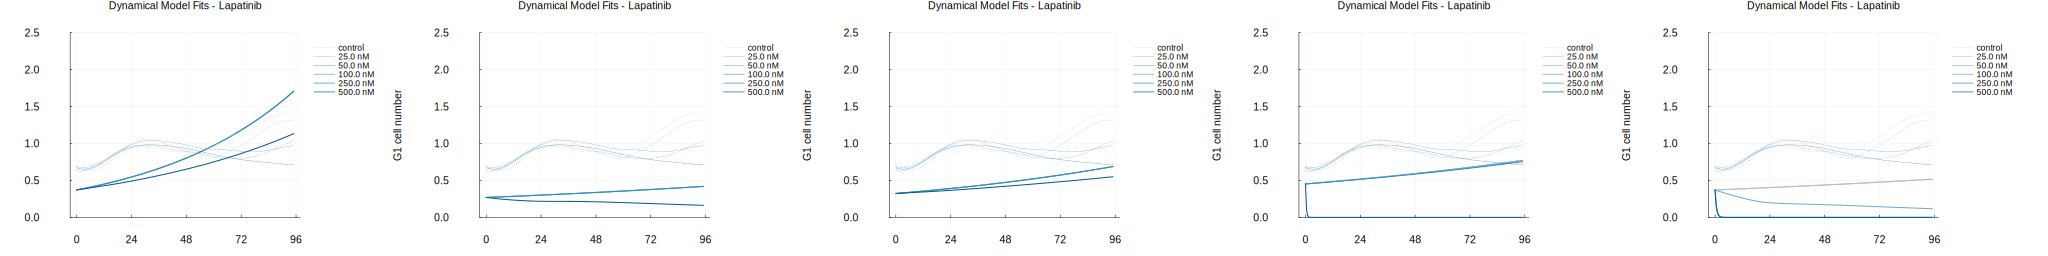

In [263]:
pl_G1_820 = plot_fig1(concs[:, 1], l_G1_s820[:, :], g1mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G1", "", :PuBu_6, time)

pl_G1_1640 = plot_fig1(concs[:, 1], l_G1_s1640[:, :], g1mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G1", "", :PuBu_6, time)

pl_G1_1232 = plot_fig1(concs[:, 1], l_G1_s1232[:, :], g1mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G1", "", :PuBu_6, time)

pl_G1_832 = plot_fig1(concs[:, 1], l_G1_s832[:, :], g1mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G1", "", :PuBu_6, time)

pl_G1_1220 = plot_fig1(concs[:, 1], l_G1_s1220[:, :], g1mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G1", "", :PuBu_6, time)

l_G1 = Plots.plot(pl_G1_820, pl_G1_1640, pl_G1_1232, pl_G1_832, pl_G1_1220, size = (4000, 500), layout = (1, 5))


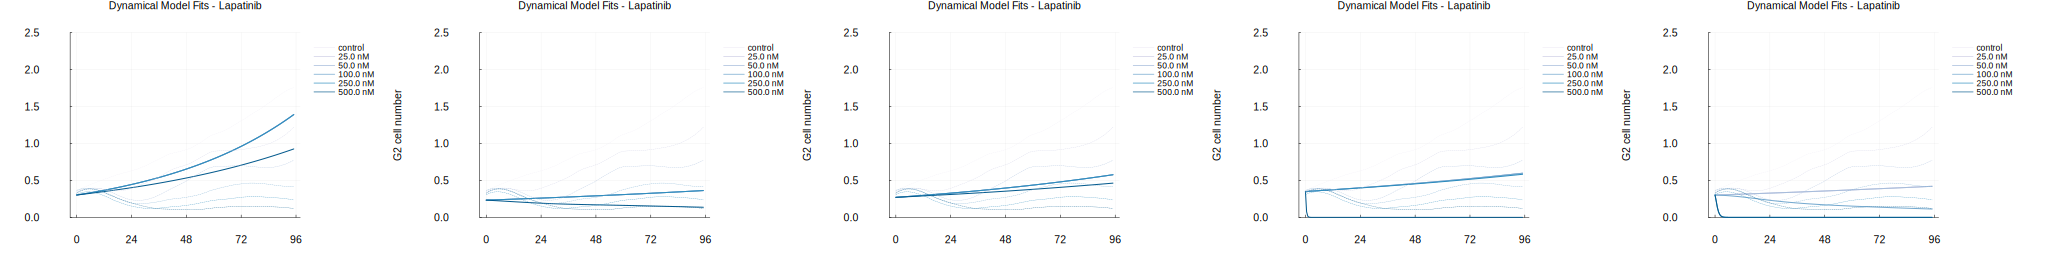

In [267]:
pl_G2_820 = plot_fig1(concs[:, 1], l_G2_s820[:, :], g2mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G2", "", :PuBu_6, time)

pl_G2_1640 = plot_fig1(concs[:, 1], l_G2_s1640[:, :], g2mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G2", "", :PuBu_6, time)

pl_G2_1232 = plot_fig1(concs[:, 1], l_G2_s1232[:, :], g2mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G2", "", :PuBu_6, time)

pl_G2_832 = plot_fig1(concs[:, 1], l_G2_s832[:, :], g2mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G2", "", :PuBu_6, time)

pl_G2_1220 = plot_fig1(concs[:, 1], l_G2_s1220[:, :], g2mshort[:, :, 1, 1], 
    "Dynamical Model Fits - Lapatinib", "G2", "", :PuBu_6, time)

l_G2 = Plots.plot(pl_G2_820, pl_G2_1640, pl_G2_1232, pl_G2_832, pl_G2_1220, size = (4000, 500), layout = (1, 5))


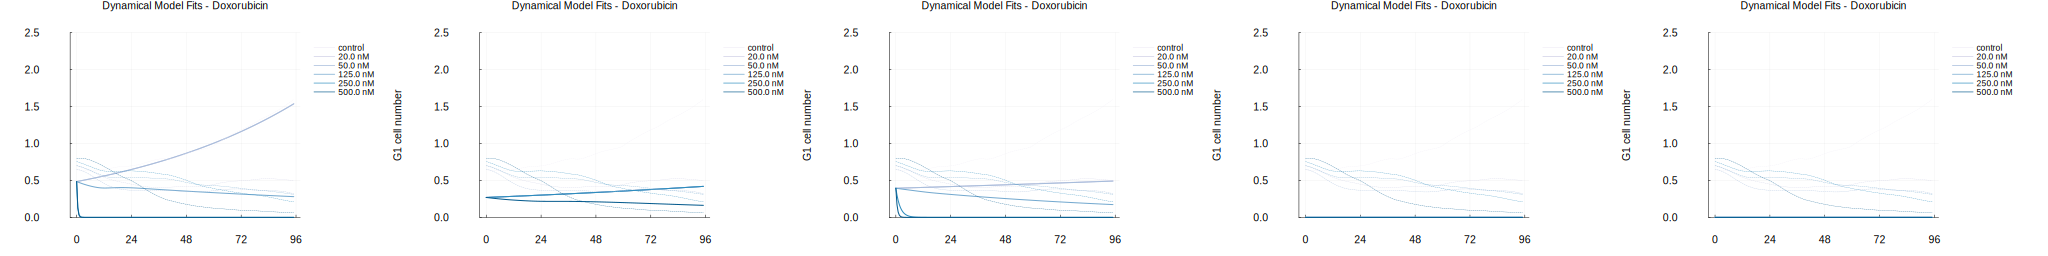

In [265]:
pd_G1_820 = plot_fig1(concs[:, 2], d_G1_s820[:, :], g1mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G1", "", :PuBu_6, time)

pd_G1_1640 = plot_fig1(concs[:, 2], d_G1_s1640[:, :], g1mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G1", "", :PuBu_6, time)

pd_G1_1232 = plot_fig1(concs[:, 2], d_G1_s1232[:, :], g1mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G1", "", :PuBu_6, time)

pd_G1_832 = plot_fig1(concs[:, 2], d_G1_s832[:, :], g1mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G1", "", :PuBu_6, time)

pd_G1_1220 = plot_fig1(concs[:, 2], d_G1_s1220[:, :], g1mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G1", "", :PuBu_6, time)

d_G1 = Plots.plot(pd_G1_820, pd_G1_1640, pd_G1_1232, pd_G1_832, pd_G1_1220, size = (4000, 500), layout = (1, 5))


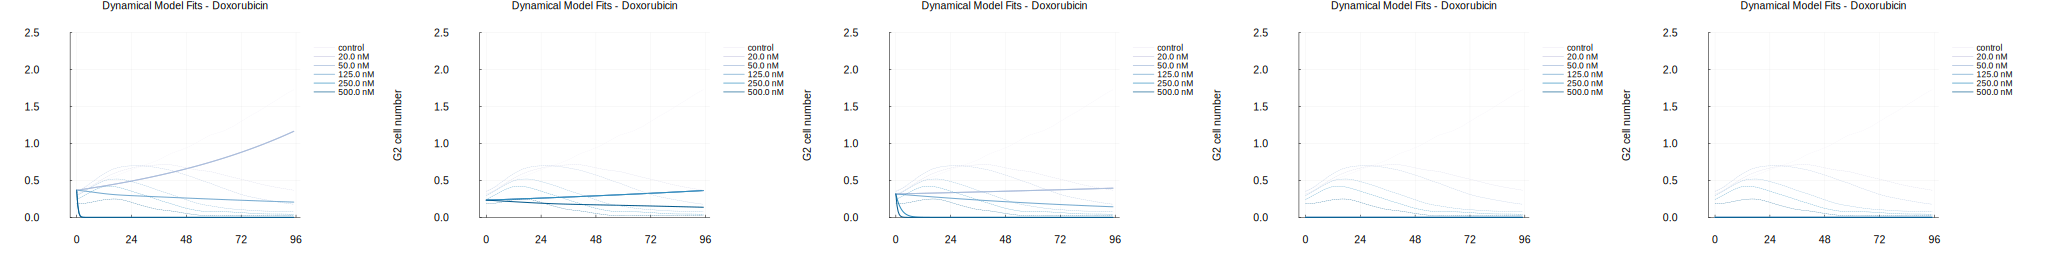

In [268]:
pd_G2_820 = plot_fig1(concs[:, 2], d_G2_s820[:, :], g2mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G2", "", :PuBu_6, time)

pd_G2_1640 = plot_fig1(concs[:, 2], d_G2_s1640[:, :], g2mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G2", "", :PuBu_6, time)

pd_G2_1232 = plot_fig1(concs[:, 2], d_G2_s1232[:, :], g2mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G2", "", :PuBu_6, time)

pd_G2_832 = plot_fig1(concs[:, 2], d_G2_s832[:, :], g2mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G2", "", :PuBu_6, time)

pd_G2_1220 = plot_fig1(concs[:, 2], d_G2_s1220[:, :], g2mshort[:, :, 2, 1], 
    "Dynamical Model Fits - Doxorubicin", "G2", "", :PuBu_6, time)

d_G2 = Plots.plot(pd_G2_820, pd_G2_1640, pd_G2_1232, pd_G2_832, pd_G2_1220, size = (4000, 500), layout = (1, 5))


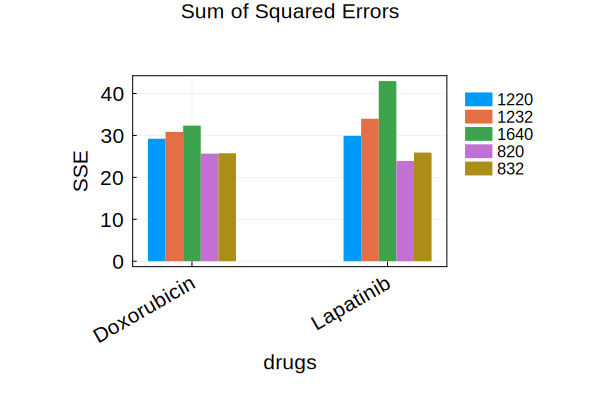

In [271]:
l_G1_combined = zeros(189, 8, 5)
l_G1_combined[:,:,1] = l_G1_820
l_G1_combined[:,:,2] = l_G1_1640
l_G1_combined[:,:,3] = l_G1_1232
l_G1_combined[:,:,4] = l_G1_832
l_G1_combined[:,:,5] = l_G1_1220

l_G2_combined = zeros(189, 8, 5)
l_G2_combined[:,:,1] = l_G2_820
l_G2_combined[:,:,2] = l_G2_1640
l_G2_combined[:,:,3] = l_G2_1232
l_G2_combined[:,:,4] = l_G2_832
l_G2_combined[:,:,5] = l_G1_1220

d_G1_combined = zeros(189, 8, 5)
d_G1_combined[:,:,1] = d_G1_820
d_G1_combined[:,:,2] = d_G1_1640
d_G1_combined[:,:,3] = d_G1_1232
d_G1_combined[:,:,4] = d_G1_832
d_G1_combined[:,:,5] = d_G1_1220

d_G2_combined = zeros(189, 8, 5)
d_G2_combined[:,:,1] = d_G2_820
d_G2_combined[:,:,2] = d_G2_1640
d_G2_combined[:,:,3] = d_G2_1232
d_G2_combined[:,:,4] = d_G2_832
d_G2_combined[:,:,5] = d_G1_1220

SSE(l_G1_combined, l_G2_combined,
    d_G1_combined, d_G2_combined,
    g1m, g2m, "", 5)